In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [23]:
def f(x):
    try:
        return (math.log(x) - ((1)/(1+math.pow(x,2))))
    except:
        print(x)

In [24]:
def f1(x):
    return (2*x)/(1+x**2)**2 + 1/x

In [25]:
def f2(x):
    return -(8*x**2)/(1+x**2)**3 + 2/(1+x**2)**2 - 1/x**2

In [26]:
X = np.linspace(0.00000001,10,1000)
Y = (lambda x: np.log(x) -(1/(1+np.pow(x,2))))(X)    
Y

array([-1.94206807e+01, -5.60406850e+00, -4.91062137e+00, -4.50465607e+00,
       -4.21627444e+00, -3.99223283e+00, -3.80881580e+00, -3.65337357e+00,
       -3.51835606e+00, -3.39889411e+00, -3.29166387e+00, -3.19429532e+00,
       -3.10503934e+00, -3.02256838e+00, -2.94585130e+00, -2.87407142e+00,
       -2.80657115e+00, -2.74281335e+00, -2.68235380e+00, -2.62482110e+00,
       -2.56990175e+00, -2.51732884e+00, -2.46687341e+00, -2.41833767e+00,
       -2.37154974e+00, -2.32635941e+00, -2.28263473e+00, -2.24025926e+00,
       -2.19912983e+00, -2.15915464e+00, -2.12025175e+00, -2.08234778e+00,
       -2.04537676e+00, -2.00927931e+00, -1.97400175e+00, -1.93949550e+00,
       -1.90571644e+00, -1.87262448e+00, -1.84018305e+00, -1.80835875e+00,
       -1.77712106e+00, -1.74644198e+00, -1.71629581e+00, -1.68665891e+00,
       -1.65750953e+00, -1.62882759e+00, -1.60059454e+00, -1.57279323e+00,
       -1.54540775e+00, -1.51842334e+00, -1.49182630e+00, -1.46560387e+00,
       -1.43974415e+00, -

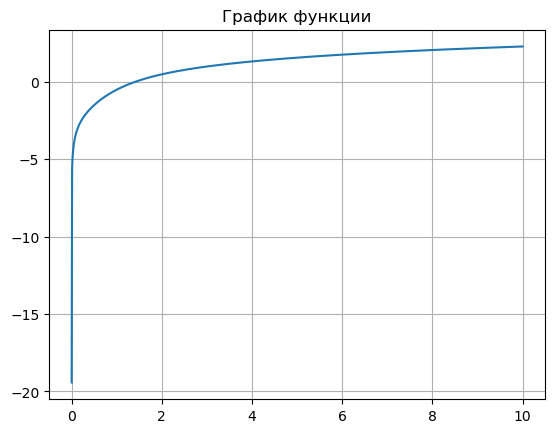

In [27]:
plt.title("График функции")
sns.lineplot(x=X,y=Y)
plt.grid()
plt.show()


    Отрезок от ~0 до ~2

In [28]:
def binpoisk(l,r, eps=1e-8):
    k = 0
    while r-l > eps:
        k += 1
        m = (l+r)/2
        if f(m) > 0:
            r = m
        else:
            l = m
    return m, k

In [29]:
def secant(a,b,eps):
    x,x0,k = a, b, 0 
    while abs(x-x0) > eps:
        x, x0, k = x0 - f(x0) / (f(x) - f(x0)) * (x - x0), x, k+1
    return x,k

In [42]:
def hordi(a,b,eps):
    x,x0,k = a+2*eps, b, 0
    # print(f(a))
    while abs(x-x0) > eps:
        # print(x0)
        # if f(a)-f(x0) == 0:
            # break
        x, x0, k = x0-(a-x0)/(f(a)-f(x0))*f(x0), x, k+1
    return x,k

In [39]:
def newton(a,b,eps):
    x0,x1,k = b + 2 *eps, b, eps
    k = 0
    while abs(x1-x0) > eps:
        x1,x0,k = x1 - f(x1)/f1(x1), x1, k+1
    return x1,k

In [40]:
eps = [1e-3,1e-5,1e-8]
funs = [binpoisk,hordi, newton, secant]

In [41]:
for fun in funs:
    print(fun.__name__)
    for e in eps:
        x,k = fun(1e-18,2,e)
        print(f"eps={e} x={x}, за k={k} итераций",)
        if abs(f(x)) > e:
            print(f"{abs(f(x))<=e}")

binpoisk
eps=0.001 x=1.4013671875, за k=11 итераций
eps=1e-05 x=1.4013290405273438, за k=18 итераций
eps=1e-08 x=1.4013216271996498, за k=28 итераций
hordi
eps=0.001 x=1.4003983502256567, за k=538 итераций
eps=1e-05 x=1.401312050426402, за k=838 итераций
eps=1e-08 x=1.4013216123961234, за k=1266 итераций
False
newton
eps=0.001 x=1.4013216215692776, за k=4 итераций
eps=1e-05 x=1.4013216221938154, за k=5 итераций
eps=1e-08 x=1.4013216221938154, за k=5 итераций
secant
eps=0.001 x=1.4013216401622486, за k=7 итераций
eps=1e-05 x=1.4013216221939977, за k=8 итераций
eps=1e-08 x=1.4013216221938154, за k=9 итераций
